In the lab, a classification tree was applied to the Carseats data set af-
ter converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable

Q:Split the data set into a training set and a test set.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from ISLP import load_data

Carseats = load_data("Carseats")
Carseats["ShelveLoc"] = Carseats["ShelveLoc"].replace({"Bad":0, "Medium":0.5, "Good":1})
Carseats["Urban"] = Carseats["Urban"].replace({"No":0, "Yes":1})
Carseats["US"] = Carseats["US"].replace({"No":0, "Yes":1})
X =  Carseats.drop(["Sales"], axis = 1)


(X_train , X_test , y_train , y_test) = skm.train_test_split(X, Carseats["Sales"], test_size =0.2, random_state =0)

Q:Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [108]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

np.mean((y_test - pred)**2)

5.00918875

Q: Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

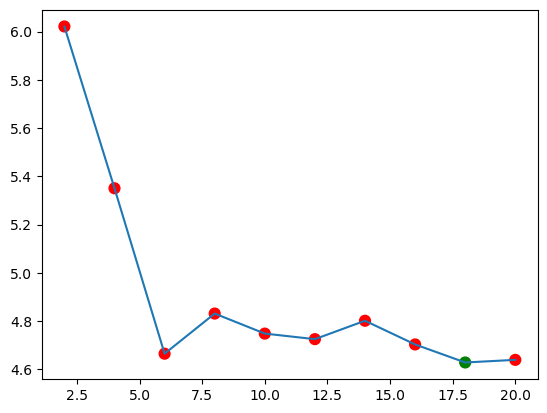

In [98]:
cv = []
nodes = []

for n_nodes in range(2, 21, 2):
    model = DecisionTreeRegressor(max_leaf_nodes = n_nodes)
    score = -skm.cross_val_score(model, X, Carseats["Sales"], cv = 10, scoring= "neg_mean_squared_error",error_score="raise") 
    cv.append(np.mean(score))
    nodes.append(n_nodes)
    
df = pd.DataFrame({"cv":cv,"nodes":nodes})
df["min"] = df["cv"] == df["cv"].min()

plt.plot(nodes, cv)
plt.scatter(df["nodes"], df["cv"], s=60, c=df["min"].map({True: "g", False: "r"}))

Q: Use random forests to analyze this data. What test MSE do
you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the
number of variables considered at each split, on the error rate
obtained.

In [126]:
names = list(X.columns)

model = RandomForestRegressor(max_features=X_train.shape [1], random_state =0)
fit = model.fit(X_train, y_train)

pred = model.predict(X_test)

imp = pd.DataFrame({"importance": fit.feature_importances_}, index = names)

print(np.mean((y_test-pred)**2))
imp.sort_values(by= "importance", ascending = False)

2.2868048781250008


,importance
ShelveLoc,0.288144
Price,0.287914
Age,0.118230
CompPrice,0.106707
Advertising,0.064471
Income,0.053614
Population,0.037858
Education,0.032053
US,0.006839
Urban,0.004171
